<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt('rabbit_data.txt')
ages = data[:, 0]
lens_weights = data[:, 1]


Mean Squared Error: 1007.3092261038003


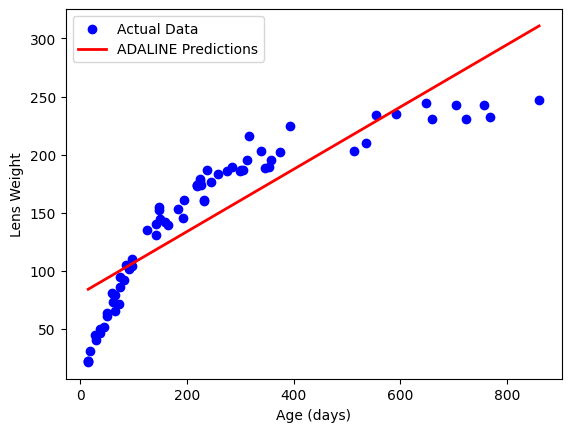

In [ ]:

class Adaline:
    def __init__(self, learning_rate=0.01, n_iter=50):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.weights_[1:] += self.learning_rate * X.T.dot(errors)
            self.weights_[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights_[1:]) + self.weights_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return self.activation(self.net_input(X))

# Prepare the data
X = ages.reshape(-1, 1)
y = lens_weights

# Standardize the data
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

# Fit the ADALINE model
adaline = Adaline(learning_rate=0.01, n_iter=50)
adaline.fit(X_std, y_std)

# Predict lens weights
predictions = adaline.predict(X_std)

# Transform predictions back to original scale
predictions_rescaled = predictions * y.std() + y.mean()

# Evaluate the predictions
mse = np.mean((predictions_rescaled - y) ** 2)
print(f"Mean Squared Error: {mse}")

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions_rescaled, color='red', linewidth=2, label='ADALINE Predictions')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


**Task 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the rabbit data from a text file
data = np.loadtxt('rabbit_data.txt')
ages = data[:, 0].reshape(-1, 1)  # First column: ages
lens_weights = data[:, 1]  # Second column: lens weights

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ages, lens_weights, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train MSE: 1834.212883603894
Test MSE: 1949.6333436668351


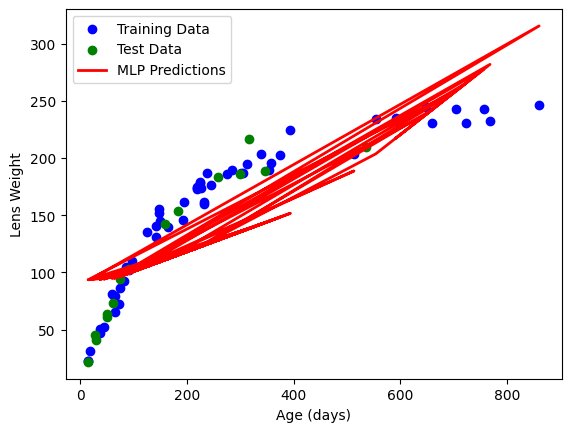

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the neural network
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate accuracy on training and test sets
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Visualize prediction results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='MLP Predictions')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


It is not exactly better than Adaline because the graph is not exactly linear even though there appears to be a positive correlation between the two data points (age and lens weight)

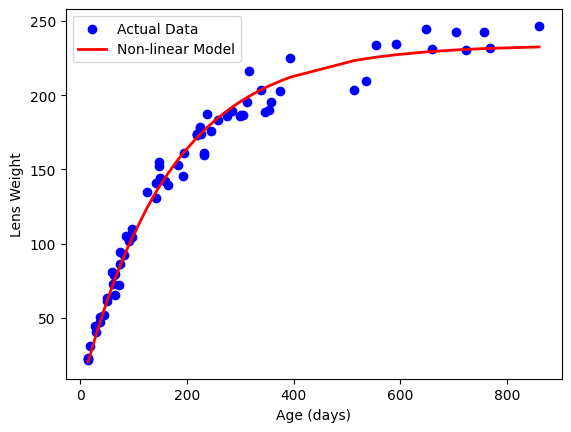

In [ ]:
# Non-linear regression model
def nonlinear_model(x):
    return 233.836 * (1 - np.exp(-0.00604 * x))

# Predictions using the non-linear model
nonlinear_predictions = nonlinear_model(ages)

# Visualize comparison
plt.scatter(ages, lens_weights, color='blue', label='Actual Data')
plt.plot(ages, nonlinear_predictions, color='red', linewidth=2, label='Non-linear Model')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


The non-linear model is clearly better that Adaline as its shape follows the data more accurately compared to the linear representation of Adaline.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Overfitting - Train MSE: 146.64345414381756
Overfitting - Test MSE: 162.35937858228138


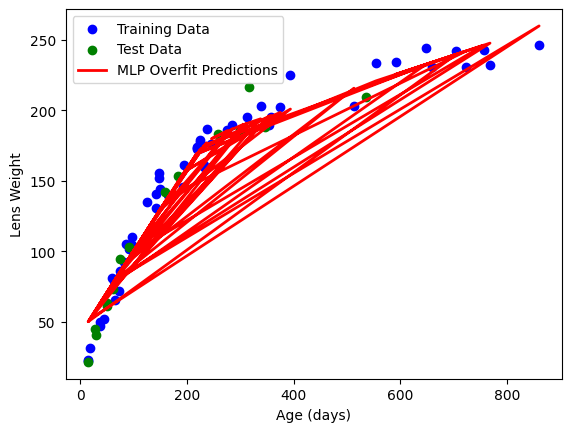

In [ ]:
# Neural network with overfitting
mlp_overfit = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp_overfit.fit(X_train_scaled, y_train)

y_train_pred_overfit = mlp_overfit.predict(X_train_scaled)
y_test_pred_overfit = mlp_overfit.predict(X_test_scaled)

train_mse_overfit = mean_squared_error(y_train, y_train_pred_overfit)
test_mse_overfit = mean_squared_error(y_test, y_test_pred_overfit)

print("Overfitting - Train MSE:", train_mse_overfit)
print("Overfitting - Test MSE:", test_mse_overfit)

# Visualize overfitting
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred_overfit, color='red', linewidth=2, label='MLP Overfit Predictions')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Underfitting - Train MSE: 25071.827396804914
Underfitting - Test MSE: 16810.549177252364


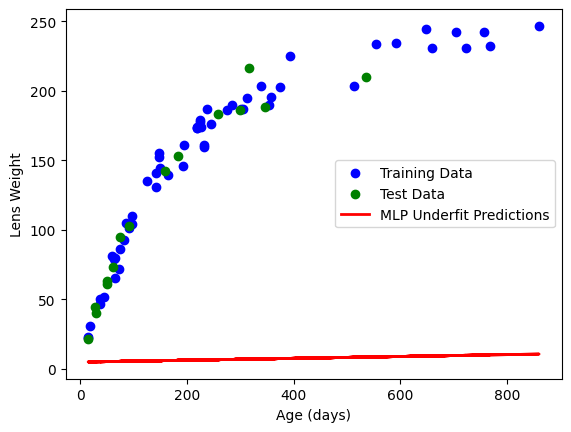

In [ ]:
# Neural network underfitting
mlp_underfit = MLPRegressor(hidden_layer_sizes=(1,), max_iter=1000, random_state=42)
mlp_underfit.fit(X_train_scaled, y_train)

y_train_pred_underfit = mlp_underfit.predict(X_train_scaled)
y_test_pred_underfit = mlp_underfit.predict(X_test_scaled)

train_mse_underfit = mean_squared_error(y_train, y_train_pred_underfit)
test_mse_underfit = mean_squared_error(y_test, y_test_pred_underfit)

print("Underfitting - Train MSE:", train_mse_underfit)
print("Underfitting - Test MSE:", test_mse_underfit)

# Visualize underfitting
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred_underfit, color='red', linewidth=2, label='MLP Underfit Predictions')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


No Normalization - Train MSE: 3133.21950649365
No Normalization - Test MSE: 1955.5415498223485


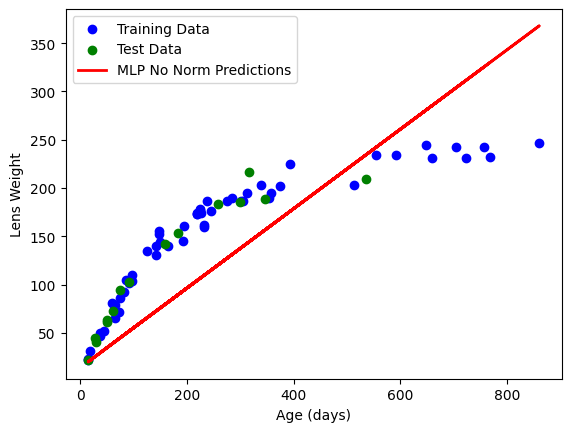

In [ ]:
# Train without normalization for comparison
mlp_no_norm = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_no_norm.fit(X_train, y_train)  # Train on raw data

y_train_pred_no_norm = mlp_no_norm.predict(X_train)
y_test_pred_no_norm = mlp_no_norm.predict(X_test)

train_mse_no_norm = mean_squared_error(y_train, y_train_pred_no_norm)
test_mse_no_norm = mean_squared_error(y_test, y_test_pred_no_norm)

print("No Normalization - Train MSE:", train_mse_no_norm)
print("No Normalization - Test MSE:", test_mse_no_norm)

# Visualize comparison
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred_no_norm, color='red', linewidth=2, label='MLP No Norm Predictions')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


With normalization, the prediction error was way lower compared to when done with no normalization. The efficiency obtaianable also means the training is faster to reach same level of accuracy.